In [1]:
from ia_model.data_preparation import load_data, prepare_data, split_data
from ia_model.model import  train_model, evaluate_model, save_model, build_dynamic_model
from ia_model.utils import ia_plot_history
import joblib

2024-02-21 05:06:26.113822: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-21 05:06:27.332585: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 05:06:29.467071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 05:06:29.467172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 05:06:29.633086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Configuration parameters for the model and data preparation
FILE_PATH = 'aggregated_data3.csv' #This data can be download from https://rcavieses.pythonanywhere.com/
FEATURE_COL = ['NOMBRE PRINCIPAL','NOMBRE ESTADO','NOMBRE OFICINA','SST','PESO DESEMBARCADO_KILOGRAMOS']#Change this if you want to add input variables
TARGET_COL = 'PESO DESEMBARCADO_KILOGRAMOS'
CATEGORICAL_COL = ['NOMBRE PRINCIPAL','NOMBRE ESTADO','NOMBRE OFICINA']
NUMERIC_COL = ['PESO DESEMBARCADO_KILOGRAMOS','SST']
steps_forecast = 12
time_steps= 12 # number of steps that lstm forecast, change this will be errors on scoore metrics ;)
layer_type =  ['LSTM','LSTM','Dense'] # add as many layer you need options: Dense or LSTM
neurons_per_layer = [10,15,1] #match the number of layers and length of neurons number list
EPOCHS = 50
BATCH_SIZE = 30
MODEL_PATH = 'mi_modelo.h5'
SCALER_X_PATH = 'scaler_X.pkl'
SCALER_Y_PATH = 'scaler_Y.pkl'


In [3]:
# Load and prepare data
df = load_data(str(FILE_PATH))
X, y, scaler_x,scaler_y, encoder , n_features = prepare_data(df, TARGET_COL, time_steps,CATEGORICAL_COL,NUMERIC_COL)
X_train, X_test, y_train, y_test = split_data(X, y)

In [4]:
# Build model
model = build_dynamic_model(time_steps,n_features,layer_type,neurons_per_layer)


In [5]:
# Train model
model, history = train_model(model, X_train, y_train, X_test, y_test, EPOCHS, BATCH_SIZE)


Epoch 1/50
710/710 [==============================] - 9s 9ms/step - loss: 6.4757e-04 - val_loss: 4.5441e-04
Epoch 2/50
710/710 [==============================] - 6s 8ms/step - loss: 3.5762e-04 - val_loss: 4.4476e-04
Epoch 3/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4648e-04 - val_loss: 4.4249e-04
Epoch 4/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4285e-04 - val_loss: 4.4253e-04
Epoch 5/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4197e-04 - val_loss: 4.4192e-04
Epoch 6/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4160e-04 - val_loss: 4.4261e-04
Epoch 7/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4138e-04 - val_loss: 4.4183e-04
Epoch 8/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4149e-04 - val_loss: 4.4219e-04
Epoch 9/50
710/710 [==============================] - 6s 8ms/step - loss: 3.4164e-04 - val_loss: 4.4182e-04
Epoch 10/50
710/710 [=======

In [6]:
# Evaluate model
mse, mae, r2 = evaluate_model(model, X_test, y_test)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

167/167 [==============================] - 1s 3ms/step
MSE: 0.0004483298720786341, MAE: 0.004761835271472214, R2: -0.014748430491044351


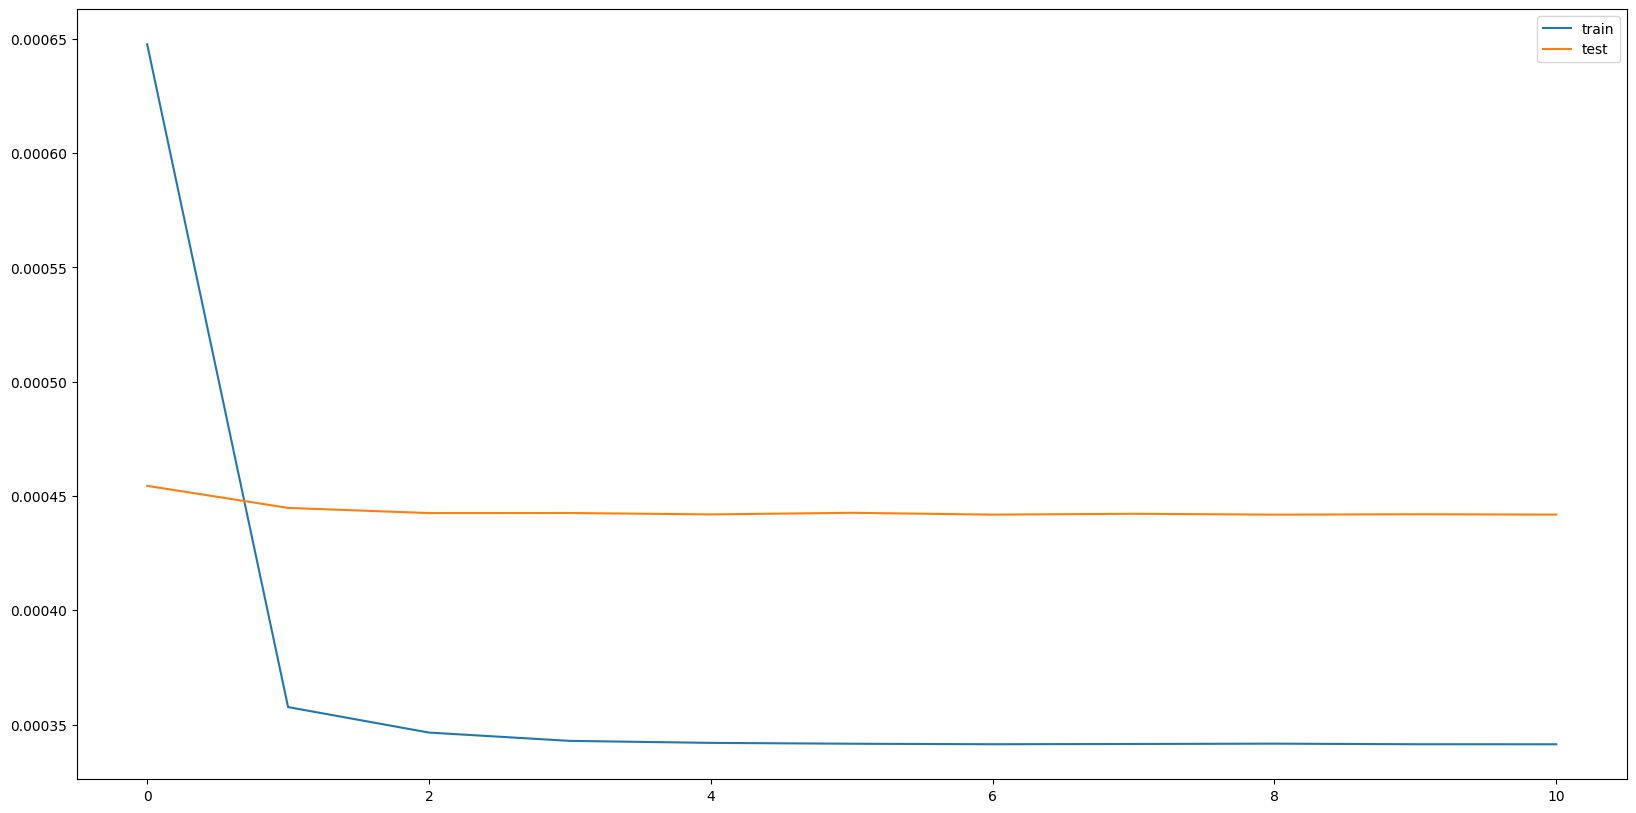

In [7]:
ia_plot_history(history)

In [8]:
save_model(model,'mi_modelo.h5')
joblib.dump(scaler_x, 'scaler_X.pkl')  # Saves the scaler
joblib.dump(scaler_y, 'scaler_Y.pkl')  # Saves the scaler
joblib.dump(encoder, 'encoder_filename.pkl')  # Saves the encoder

/opt/conda/envs/cedo/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['encoder_filename.pkl']